In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [11]:
dataset = pd.read_csv('./data/creditcard.csv')

# Shuffling the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,34638.0,-0.548923,1.532769,0.577787,3.136562,-0.395448,0.602788,0.135323,0.634965,-1.049769,...,-0.010092,0.134579,-0.037320,-0.088122,-0.183652,0.255073,0.117465,0.034019,75.08,0
1,16719.0,0.957757,-0.012066,0.891782,1.741956,-0.521546,-0.163656,-0.105018,-0.049454,1.703597,...,-0.320688,-0.675311,0.050336,0.316005,0.313033,-0.566726,0.011398,0.036516,94.48,0
2,161823.0,1.776551,-0.466557,-0.524225,1.280092,-0.386883,-0.038308,-0.392219,0.009316,0.888442,...,0.273920,0.673773,0.067562,0.651136,-0.092042,-0.601575,0.032322,-0.005818,110.00,0
3,34109.0,-0.712414,0.756433,2.838543,0.877438,-0.206759,0.089344,0.613233,-0.451953,0.999319,...,-0.214148,0.283815,-0.246355,0.383607,-0.026914,-0.400903,-0.086272,-0.430740,9.48,0
4,44102.0,-1.266161,1.258889,0.755620,-0.633531,-0.456218,-0.355905,-0.089204,0.904913,-0.493441,...,-0.006799,-0.236629,-0.070072,0.050716,-0.148484,0.326562,-0.328238,-0.024573,4.00,0


In [12]:
# Preprocessing
labels = dataset['Class']
unsupervised_df = dataset.drop(columns=['Class'])

# Normalizing
scaler = MinMaxScaler(feature_range=(0, 1))
unsupervised_data = scaler.fit_transform(unsupervised_df)

In [15]:
# Kfold validation
X = unsupervised_df.to_numpy()
y = np.array(labels)
k_fold = 5
accuracies_train = []
accuracies_test = []
spacing = round(X.shape[0] / k_fold)
for k in range(k_fold):
    lower = k * spacing
    upper = (k + 1) * spacing
    x_train = np.concatenate((X[0: lower][:], X[upper:][:]))
    y_train = np.concatenate((y[0: lower], y[upper:]))
    x_test = X[lower: upper]
    y_test = y[lower: upper]

    # Initializing and running Gaussian Mixture Model
    gmm = GaussianMixture(n_components=2)
    prediction_train = gmm.fit_predict(x_train)
    train_accuracy = np.count_nonzero(prediction_train == y_train) / len(prediction_train)
    accuracies_train.append(train_accuracy)
    prediction_test = gmm.predict(x_test)
    test_accuracy = np.count_nonzero(prediction_test == y_test) / len(prediction_test)
    accuracies_test.append(test_accuracy)

print(np.mean(accuracies_train), np.mean(accuracies_test))

0.561990116131071 0.5611839679780903


In [16]:
# Evaluating definition of clusters
train_silhouette_score = silhouette_score(x_train, prediction_train)
test_silhouette_score = silhouette_score(x_test, prediction_test)

print(f'Silhouette score on train data = {train_silhouette_score}')
print(f'Silhouette score on test data = {test_silhouette_score}')

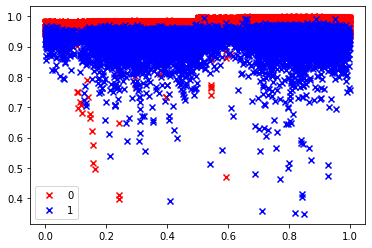

In [23]:
# Plotting based on test

toPlotMal = x_test[prediction_test == 0]
toPlotBen = x_test[prediction_test == 1]

plt.scatter(toPlotMal[:, 0], toPlotMal[:, 1], c = "red", marker = 'x', label = "0")
plt.scatter(toPlotBen[:, 0], toPlotBen[:, 1], c = "blue", marker = 'x', label = "1")
plt.legend()
plt.show()